### **Лабораторная работа №2**
### Диаграмма совхождений
#### *Выполнил: студент группы 8ПМ11, Кайдаров Алибек*

Цель работы: выбрать одну из пьес Шекспира (на русском языке) – Макбет, Кориолан и т.д. Разработать алгоритм извлечения
имен участвующих в сцене персонажей (не путать сцену с актом). Счет идет по сценам. Если в одной сцене появлялись 2
персонажа, то +1 вхождение.
Провести замеры времени выполнения извлечения имен и итогового подсчета вхождений. Рекомендуется проводить измерения
по мере внесения изменений в код.
*Входные данные:* текст произведения.
*Выходные данные:* тепловая карта сходства (heatmap, на осях X и Y – имена персонажей).

Импорт библиотек

In [1]:
import re
from string import punctuation
import time
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
import seaborn as sns

Чтение файла, создание переменной для дальнейшей работы

In [2]:
with open("D:\Spring_2022\BD_tools\\Julius_Caesar.txt", "r") as txt:
        text = txt.read()

Разделение текста на элементы по знаку абзаца, определение начала непосредственно 1 акта пьесы

In [3]:
start_time = time.time()
text = text.split("\n")
start_ind = 0
for i in range(len(text)):
        if re.search(r"АКТ", text[i]) is not None:
                start_ind = i
                break
text = text[start_ind:]

Создание листа, содержащего строки, отобранные по следующему принципу, строка перед ней и после неё содержит пустые строки, не содержит знаков препинания

In [4]:
punctuation_set = set(punctuation)
scene_list = []
for i in range(len(text) - 1):
        if text[i + 1] == "" and text[i - 1] == "" and set(text[i]).isdisjoint(punctuation_set):
                scene_list.append(text[i])

Отчистка листа с именами по сценам и актам от лишних знаков

In [5]:
for i in range(len(scene_list)):
        scene_list[i] = scene_list[i].lstrip(" ")
        scene_list[i] = scene_list[i].replace("\x14", "")
        scene_list[i] = scene_list[i].replace("\x15", "")
        if re.search(r"АКТ ", scene_list[i]) is not None:
                scene_list[i] = "АКТ"
        elif re.search(r"СЦЕНА ", scene_list[i]) is not None:
                scene_list[i] = "СЦЕНА"
scene_list.remove("")
scene_list.remove("АКТ")

Выборка уникальных значений имен

In [6]:
name_list = list()
for i in set(scene_list):
        if i != "СЦЕНА":
                name_list.append(i)
name_list.remove("АКТ")
name_list.sort()

Разбиение на сцены

In [7]:
scene_list = [set(group) for k, group in groupby(scene_list, lambda x: x == "СЦЕНА") if not k]

Создание и заполнение матрицы совхождений

In [8]:
co_matrix = np.zeros((len(name_list), len(name_list)))
for scene in scene_list:
        for i in range(len(name_list)):
                for j in range(len(name_list)):
                        if (name_list[i] in scene) and (name_list[j] in scene):
                                co_matrix[i][j] += 1
print(f"Длительность операции: {time.time() - start_time} секунд")

Длительность операции: 0.08401703834533691 секунд


'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

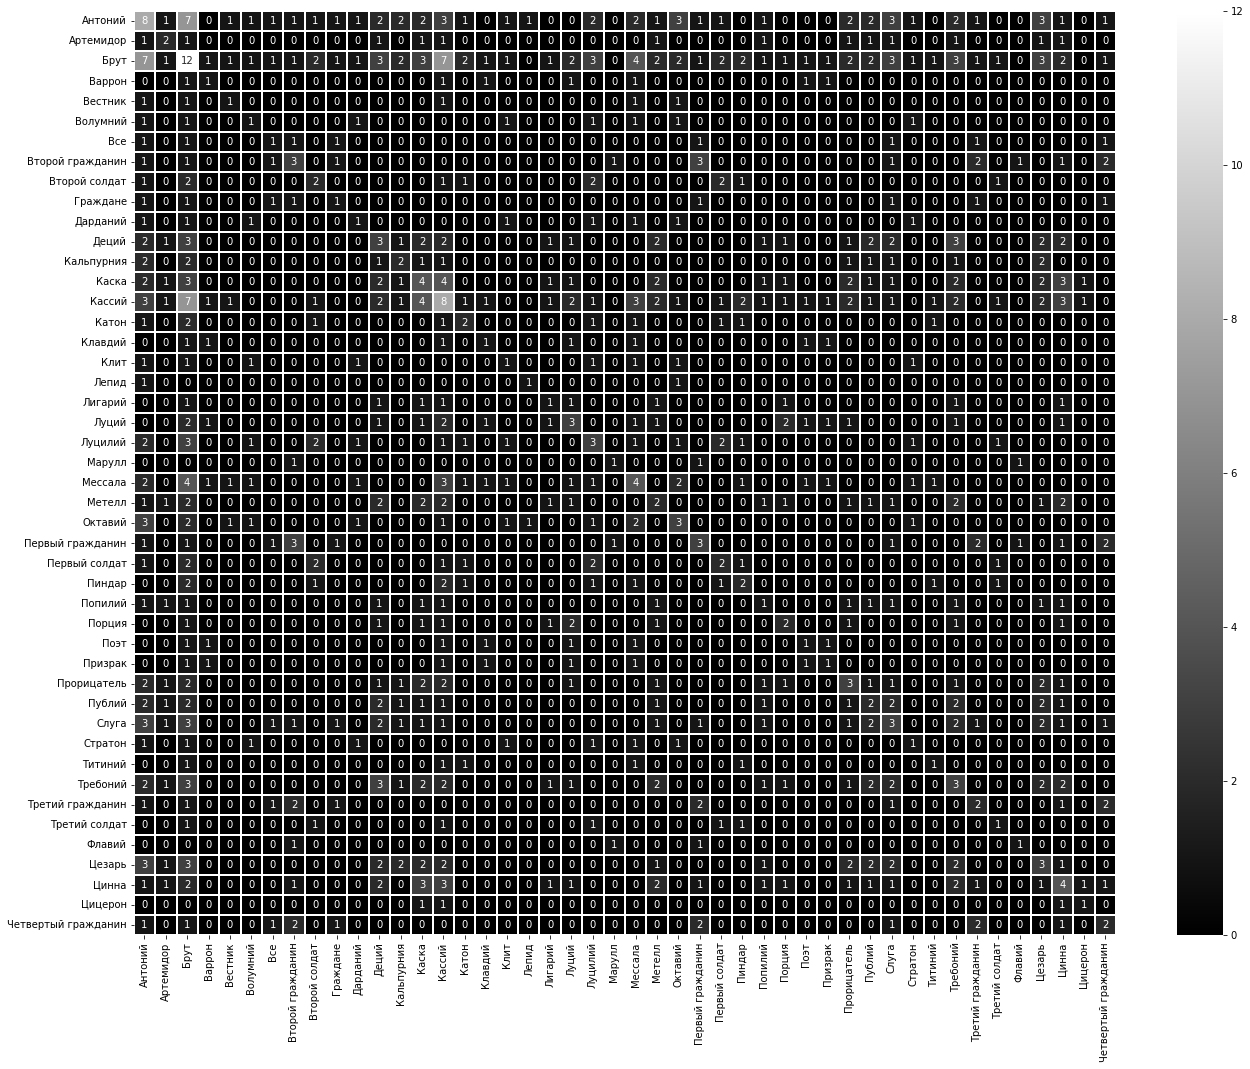

In [11]:
plt.subplots(figsize=(22,17))
h_map = sns.heatmap(co_matrix, annot=True, linewidths=.05, cmap="gist_yarg_r")
h_map.set_xticklabels(name_list, rotation = 90)
h_map.set_yticklabels(name_list, rotation = 0)
plt.show()

In [10]:
scene_list

[{'Второй гражданин', 'Марулл', 'Первый гражданин', 'Флавий'},
 {'Антоний', 'Брут', 'Кальпурния', 'Каска', 'Кассий', 'Прорицатель', 'Цезарь'},
 {'АКТ', 'Каска', 'Кассий', 'Цинна', 'Цицерон'},
 {'Брут',
  'Деций',
  'Каска',
  'Кассий',
  'Лигарий',
  'Луций',
  'Метелл',
  'Порция',
  'Требоний',
  'Цинна'},
 {'Антоний',
  'Брут',
  'Деций',
  'Кальпурния',
  'Публий',
  'Слуга',
  'Требоний',
  'Цезарь'},
 {'Артемидор'},
 {'АКТ', 'Луций', 'Порция', 'Прорицатель'},
 {'Антоний',
  'Артемидор',
  'Брут',
  'Деций',
  'Каска',
  'Кассий',
  'Метелл',
  'Попилий',
  'Прорицатель',
  'Публий',
  'Слуга',
  'Требоний',
  'Цезарь',
  'Цинна'},
 {'Антоний',
  'Брут',
  'Все',
  'Второй гражданин',
  'Граждане',
  'Первый гражданин',
  'Слуга',
  'Третий гражданин',
  'Четвертый гражданин'},
 {'АКТ',
  'Второй гражданин',
  'Первый гражданин',
  'Третий гражданин',
  'Цинна',
  'Четвертый гражданин'},
 {'Антоний', 'Лепид', 'Октавий'},
 {'Брут',
  'Второй солдат',
  'Кассий',
  'Луцилий',
  'Пер